In [1]:
set.seed(1352)
mu = sample(c(0,1,2),1)
X = arima.sim(n=70, list(ar = c(.7)), sd=5)
Y = mu + X

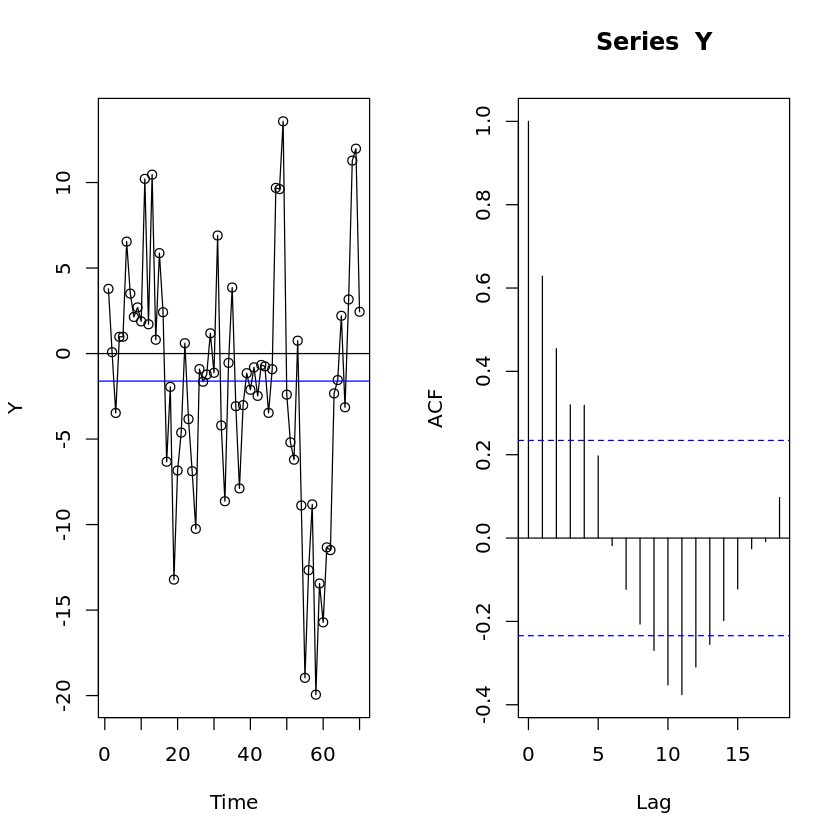

In [2]:
layout(matrix(1:2, 1, 2))
plot(Y, type="o")
abline(h=0)
abline(h=mean(Y), col="blue")
acf(Y)

In [3]:
n = length(Y)
n

[1] 70

In [4]:
Ga <- acf(Y, type="covariance", plot=FALSE)
str(Ga)

List of 6
 $ acf   : num [1:19, 1, 1] 48.8 30.6 22.2 15.6 15.5 ...
 $ type  : chr "covariance"
 $ n.used: int 70
 $ lag   : num [1:19, 1, 1] 0 1 2 3 4 5 6 7 8 9 ...
 $ series: chr "Y"
 $ snames: NULL
 - attr(*, "class")= chr "acf"


In [5]:
Ga.hat = Ga$acf
sum.limit = floor(sqrt(n))
nu.sq <- Ga.hat[1] + 2*sum((1-(1:sum.limit)/n) * Ga.hat[2:(sum.limit+1)])
mean(Y)

[1] -1.610627

In [6]:
sqrt(nu.sq/n)

[1] 1.686085

In [7]:
sqrt(var(Y)/n)

[1] 0.8407277

In [8]:
CI.u <- mean(Y) + 1.96*sqrt(nu.sq/n)
CI.l <- mean(Y) - 1.96*sqrt(nu.sq/n)
c(CI.l, mean(Y), CI.u)

[1] -4.915354 -1.610627  1.694100

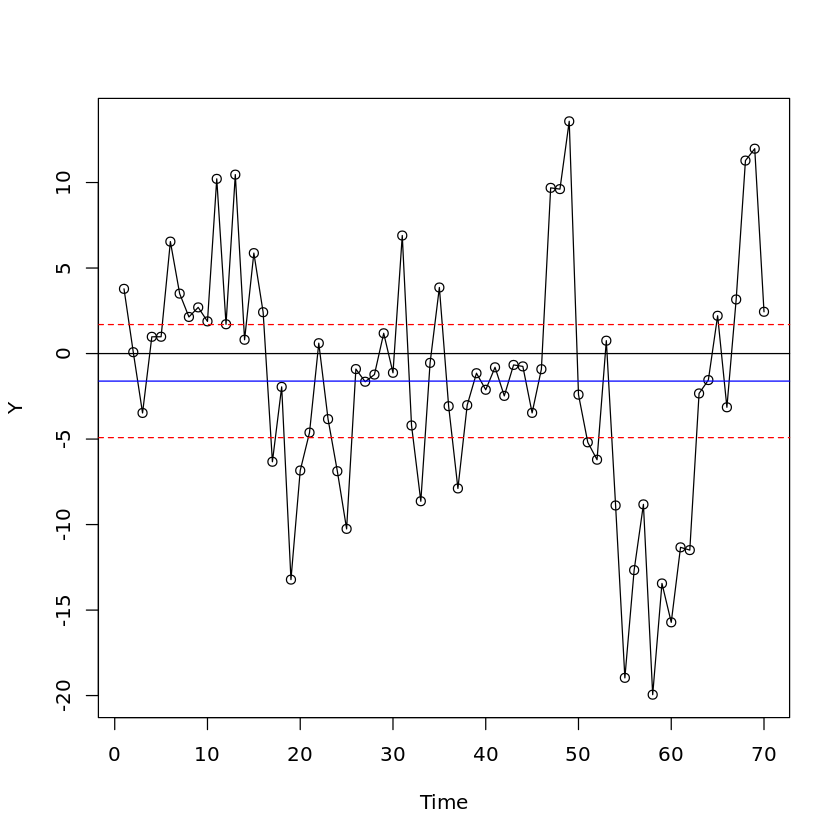

In [10]:
plot(Y, type="o")
abline(h=0)
abline(h=mean(Y), col="blue")
abline(h=c(CI.u, CI.l), col="red", lty=2)

# Example: Color data

In [1]:
acf1 <- acf
library(TSA)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [2]:
acf <- acf1

In [3]:
data(color)

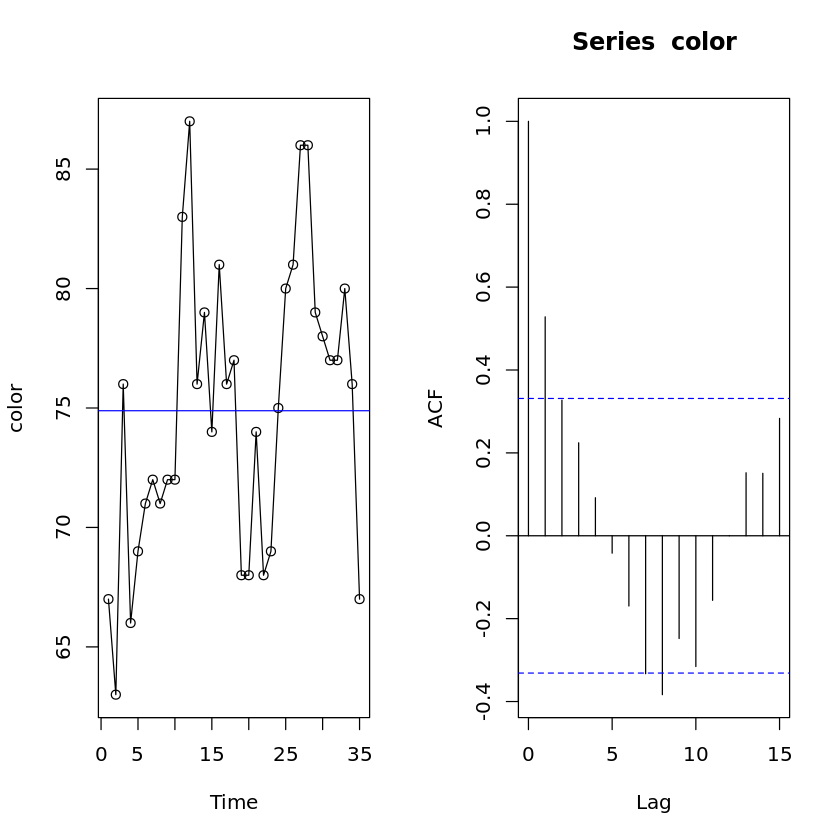

In [4]:
layout(matrix(1:2, 1, 2))
plot(color, type="o")
abline(h=0)
abline(h=mean(color), col="blue")
acf(color)

In [5]:
Y = color
n = length(Y)
n

[1] 35

In [6]:
Ga <- acf(Y, type="covariance", plot=FALSE)
str(Ga)

List of 6
 $ acf   : num [1:16, 1, 1] 36.04 19.04 11.79 8.08 3.31 ...
 $ type  : chr "covariance"
 $ n.used: int 35
 $ lag   : num [1:16, 1, 1] 0 1 2 3 4 5 6 7 8 9 ...
 $ series: chr "Y"
 $ snames: NULL
 - attr(*, "class")= chr "acf"


In [9]:
Ga.hat = Ga$acf
sum.limit = floor(sqrt(n))
nu.sq <- Ga.hat[1] + 2*sum((1-(1:sum.limit)/n) * Ga.hat[2:(sum.limit+1)])
mean(Y)

[1] 74.88571

In [10]:
sqrt(nu.sq/n)

[1] 1.799286

In [11]:
sqrt(var(Y)/n)

[1] 1.029621

In [12]:
CI.u <- mean(Y) + 1.96*sqrt(nu.sq/n)
CI.l <- mean(Y) - 1.96*sqrt(nu.sq/n)
c(CI.l, mean(Y), CI.u)

[1] 71.35911 74.88571 78.41232

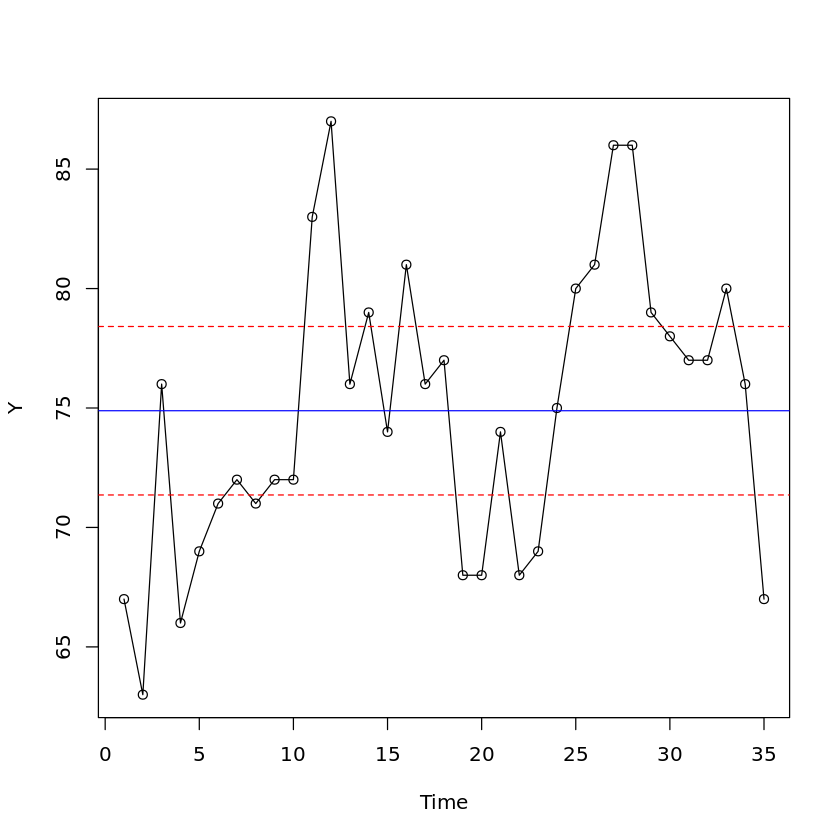

In [13]:
plot(Y, type="o")
abline(h=0)
abline(h=mean(Y), col="blue")
abline(h=c(CI.u, CI.l), col="red", lty=2)

# DOW Jones Example

In [15]:
D <- read.csv("https://nmimoto.github.io/datasets/dowj.csv")

In [16]:
D1 <- ts(D, start=1, freq=1)

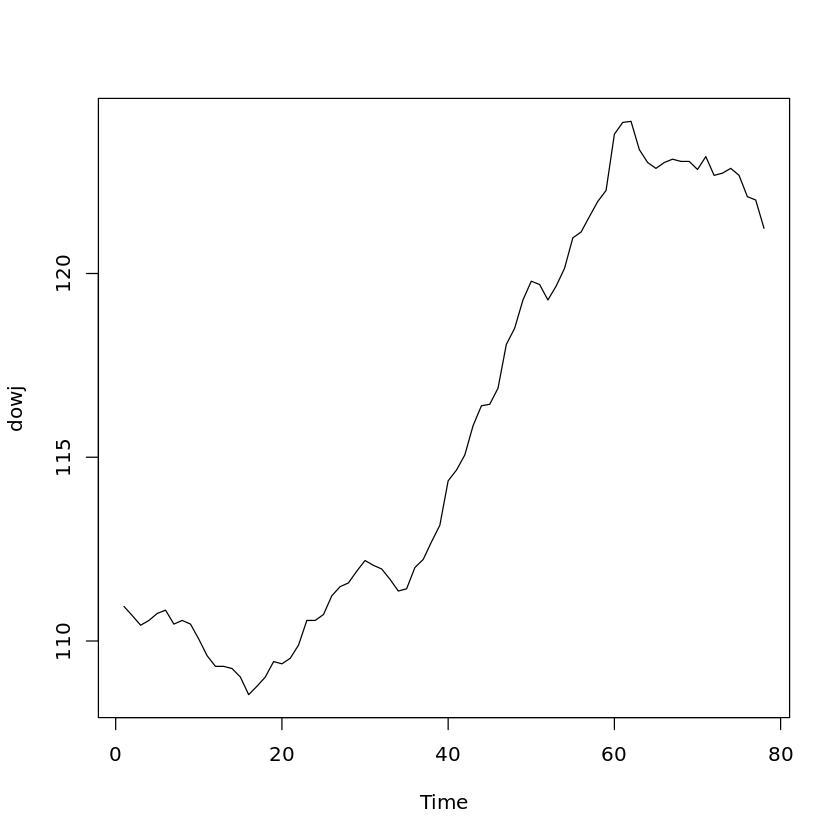

In [17]:
plot(D1)

In [19]:
D2 = diff(D1)

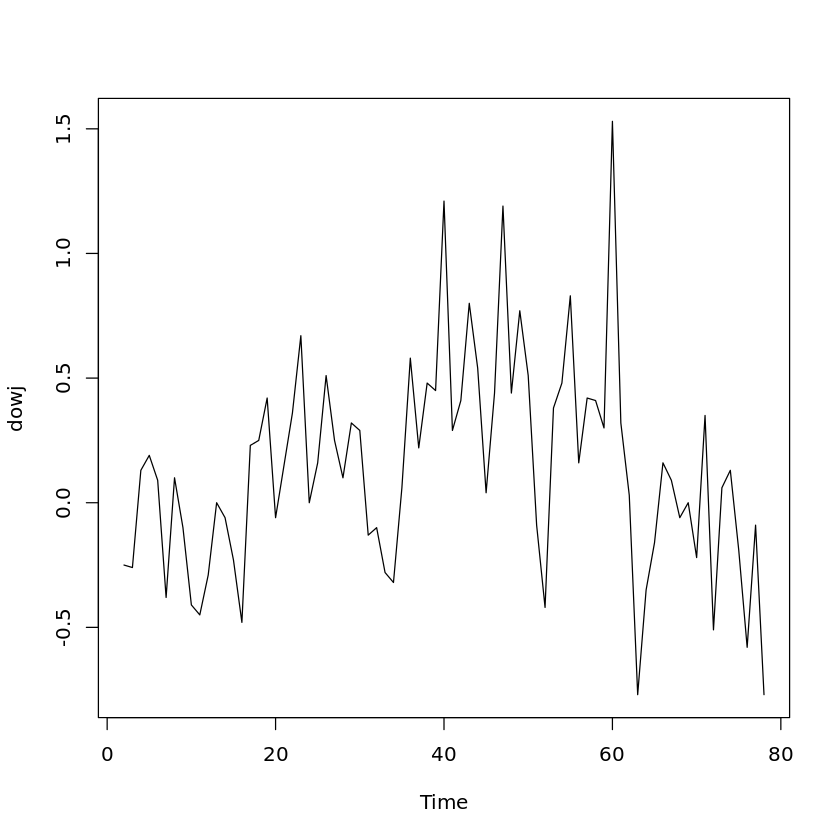

In [20]:
plot(D2)

In [21]:
mean(D2)

[1] 0.1336364

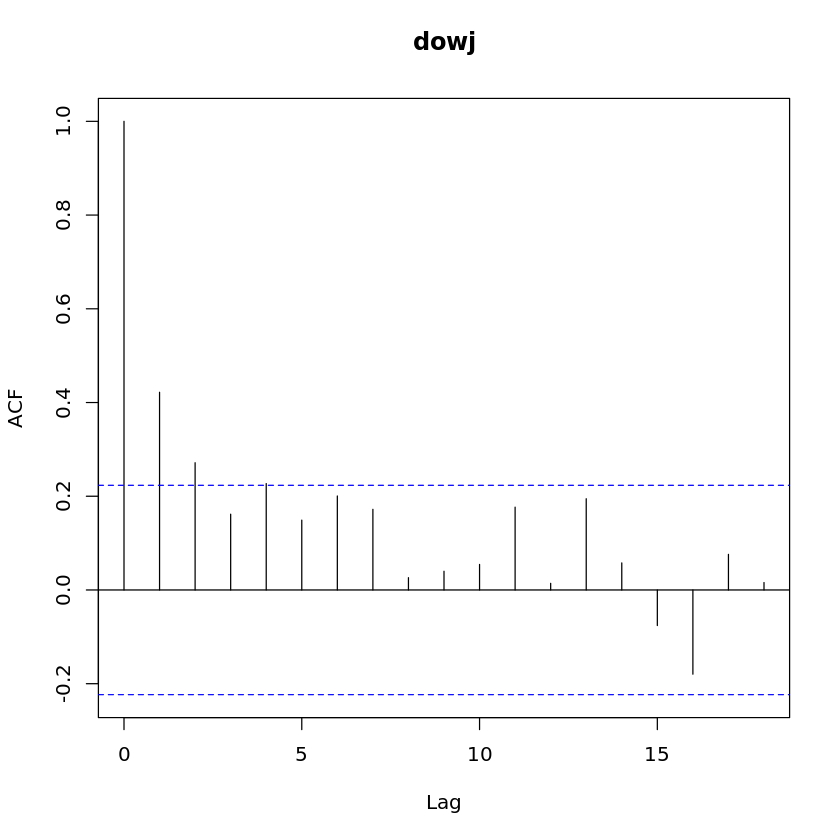

In [22]:
acf(D2)

In [25]:
Dv2 <- read.csv("https://nmimoto.github.io/datasets/djao2.csv")

In [26]:
Dv22 = ts(Dv2, start=1, freq=1)

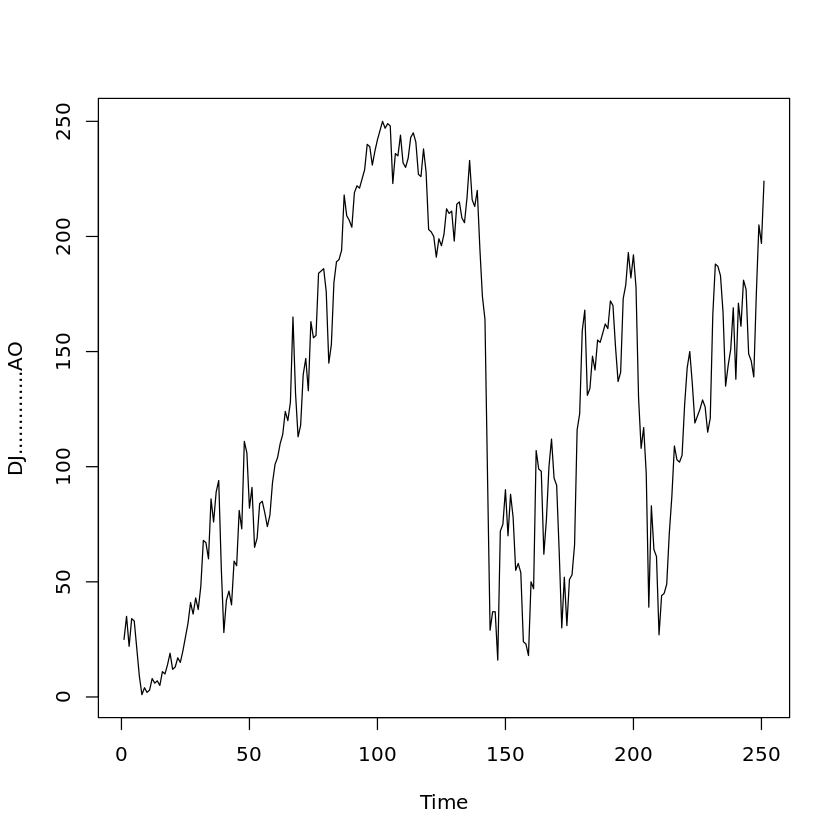

In [27]:
plot(Dv22)

In [28]:
Dv222 = diff(Dv22)

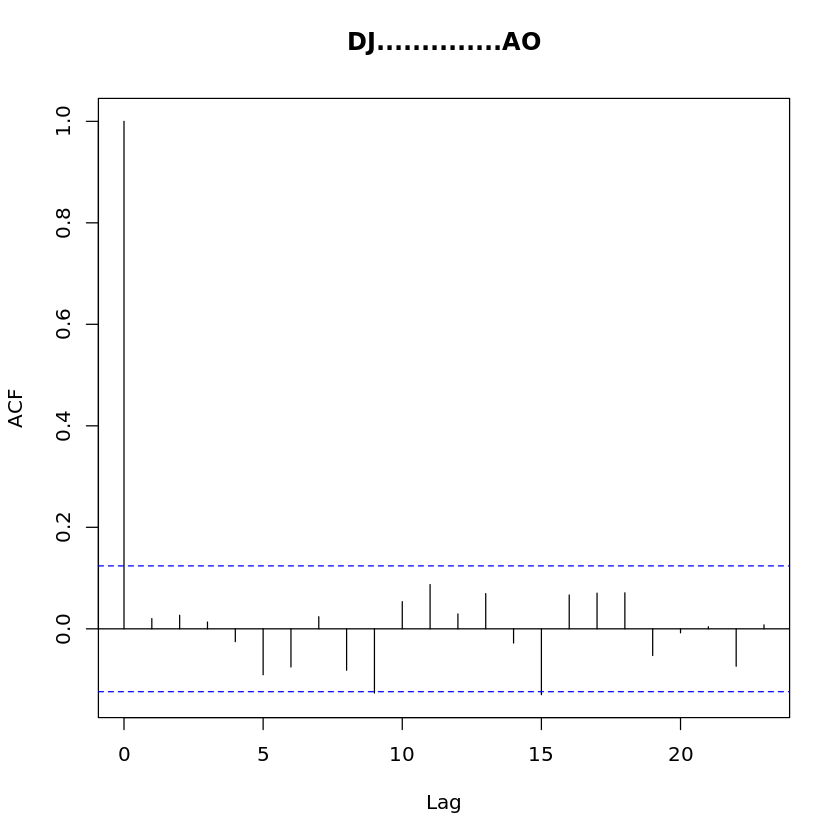

In [29]:
acf(Dv222)

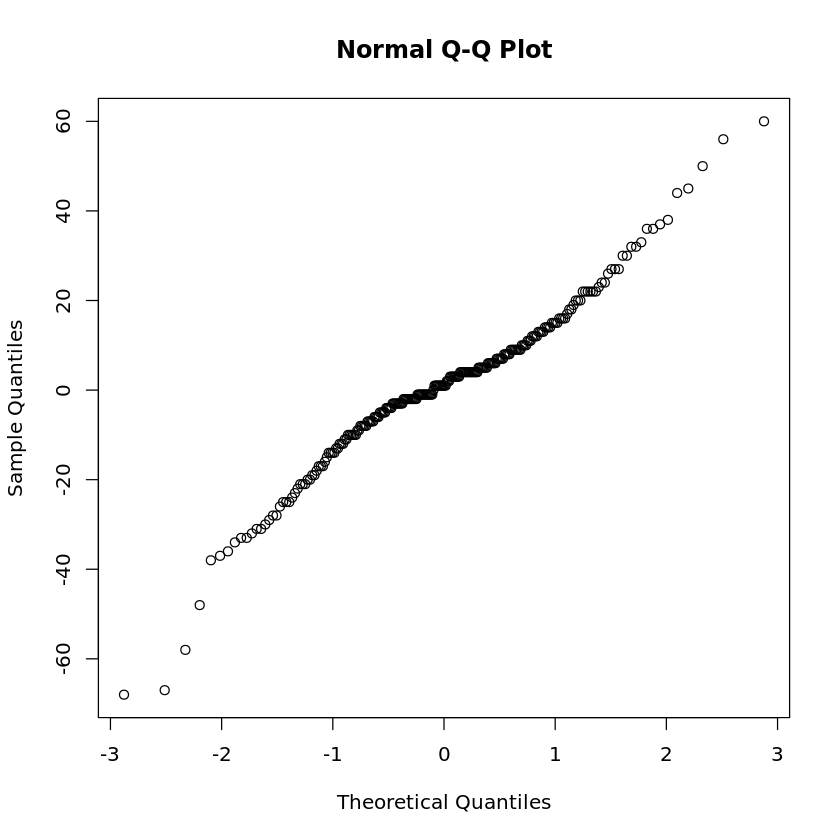

In [30]:
qqnorm(Dv222)